# ComBINeS - Show off your data
Dr. Nandor Poka @ 24.06.2020

Python

## Data source:

- website: https://sozialministerium.baden-wuerttemberg.de/de/gesundheit-pflege/gesundheitsschutz/infektionsschutz-hygiene/informationen-zu-coronavirus/
- xlsx table: https://sozialministerium.baden-wuerttemberg.de/fileadmin/redaktion/m-sm/intern/downloads/Downloads_Gesundheitsschutz/Tabelle_Coronavirus-Faelle-BW.xlsx

In [37]:
# Generic imports
import numpy as np
import pandas as pd
from math import pi

#Bokeh imports
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, ColumnDataSource
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider, Band, Select, Legend
from bokeh.models.formatters import FuncTickFormatter
from bokeh.themes import built_in_themes
from bokeh.io import curdoc
output_notebook()

# Matplotlib imports
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn imports
import seaborn as sns
sns.set()

# Ploty imports
import plotly.graph_objects as go


Loading BokehJS ...

In [38]:
pd.options.display.max_rows = 15
pd.options.display.max_columns = 15
rawdata = pd.read_csv('COVID_BW.csv', index_col=0, skiprows=6, skipfooter=2, engine='python')
rawdata.fillna(value=0, inplace=True)
total_row = rawdata[-1:]
bw_infections = rawdata.iloc[:-1, :]
infections_data = bw_infections[bw_infections.columns[0]]
infections_total = sum(infections_data)
bw_infections

,6/24/2020,6/23/2020,6/22/2020,6/19/2020,6/18/2020,6/17/2020,6/16/2020,...,3/2/2020,3/1/2020,2/29/2020,2/28/2020,2/27/2020,2/26/2020,2/25/2020
Alb-Donau-Kreis,651,652,652,650,650,641,641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baden-Baden (Stadtkreis),185,185,185,185,185,185,185,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biberach,601,601,601,600,600,600,600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Böblingen,1426,1420,1419,1416,1415,1422,1413,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0
Bodenseekreis,295,295,294,294,294,294,292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tübingen,1292,1292,1292,1292,1292,1292,1291,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0
Tuttlingen,509,508,506,505,505,505,505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulm (Stadtkreis),288,288,288,288,288,293,293,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Waldshut,312,311,311,311,311,311,311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
d_rawdata = pd.read_csv('COVID_BW_deaths.csv', index_col=0, skiprows=6, skipfooter=2, engine='python')
d_rawdata.fillna(value=0, inplace=True)
d_total_row = d_rawdata[-1:]
bw_deaths = d_rawdata.iloc[:-1, :]
deaths_data = bw_deaths[bw_deaths.columns[0]]
d_total = sum(deaths_data)
bw_deaths

,6/24/2020,6/23/2020,6/22/2020,6/19/2020,6/18/2020,6/17/2020,6/16/2020,...,3/18/2020,3/17/2020,3/16/2020,3/15/2020,3/14/2020,3/13/2020,3/12/2020
Alb-Donau-Kreis,27,27,27,27,27,26,26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Baden-Baden (Stadtkreis),19,19,19,19,19,19,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Biberach,34,34,34,34,34,34,34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Böblingen,47,47,47,47,47,47,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bodenseekreis,8,8,8,8,8,8,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tübingen,60,60,60,60,59,59,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tuttlingen,23,23,23,23,23,23,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulm (Stadtkreis),5,5,5,5,5,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waldshut,35,35,35,35,35,35,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic plotting

### Simple Bar chart

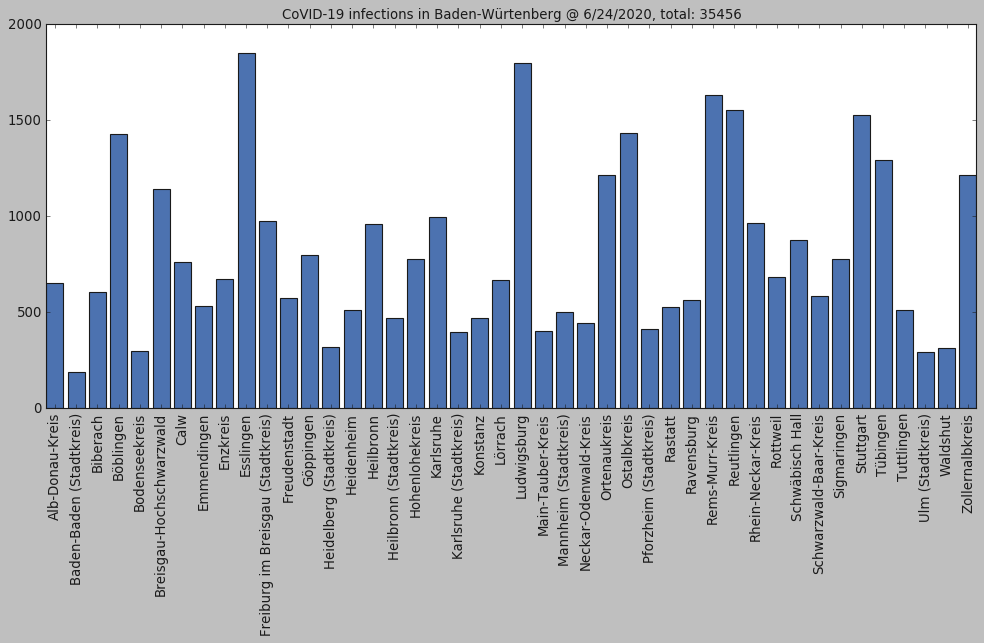

In [40]:
#Matplotlib
with plt.style.context('classic'):
    mp_fig, mp_axes= plt.subplots(figsize=[15,6])
    mp_axes.set_title(f'CoVID-19 infections in Baden-Würtenberg @ {bw_infections.columns[0]}, total: {infections_total}', fontsize=12)
    plt.xticks(rotation='vertical')
    mp_axes.bar(list(infections_data.index), infections_data.values)

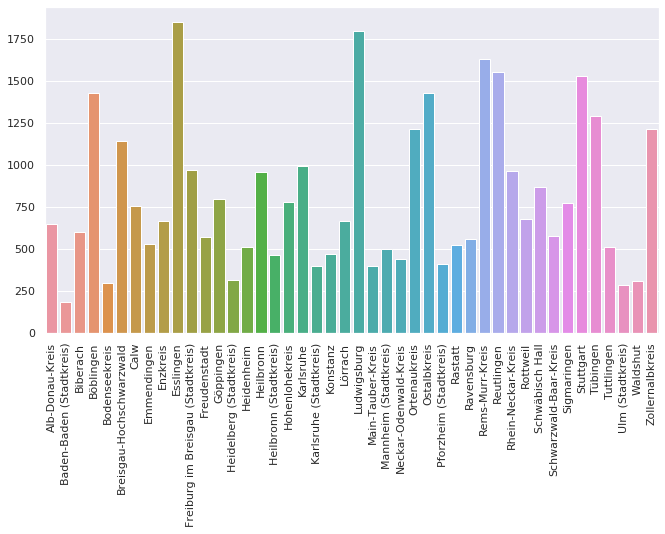

In [10]:
# Seaborn
sb_fig, sb_axes= plt.subplots(figsize=[11,6])
sb_chart=sns.barplot(x=list(infections_data.index),y=infections_data.values)
sb_chart.set_xticklabels(rotation=90, labels=sb_chart.get_xticklabels())
sb_chart

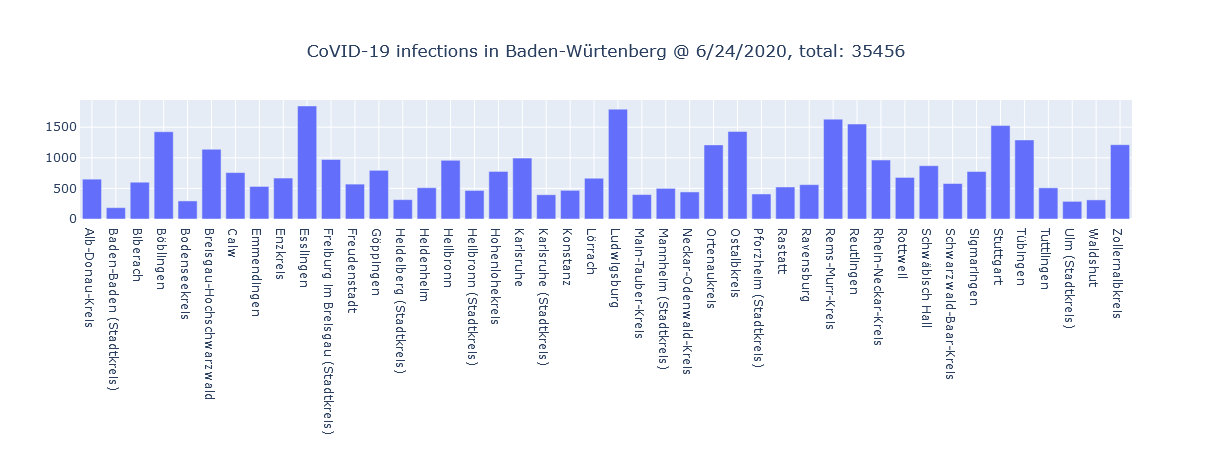

In [41]:
# Plotly
fig = go.Figure(data=go.Bar(x=list(infections_data.index), y=infections_data.values))
fig.update_layout(    title={
        'text': f'CoVID-19 infections in Baden-Würtenberg @ {bw_infections.columns[0]}, total: {infections_total}',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [42]:
# Bokeh
cds = ColumnDataSource(data=dict(x=list(infections_data.index), y=infections_data.values))
title=f'CoVID-19 infections in Baden-Würtenberg @ {bw_infections.columns[0]}, total: {infections_total}'
bok_fig = figure(x_range=cds.data['x'], width=900, title=title)
bok_fig.xaxis.major_label_orientation = pi/2
bok_fig.vbar(x='x', top='y', source=cds, width=0.7)
bok_fig.y_range.start = 0
bok_fig.title.align='center'
curdoc().theme='caliber'
show(bok_fig)

### Scatter plot

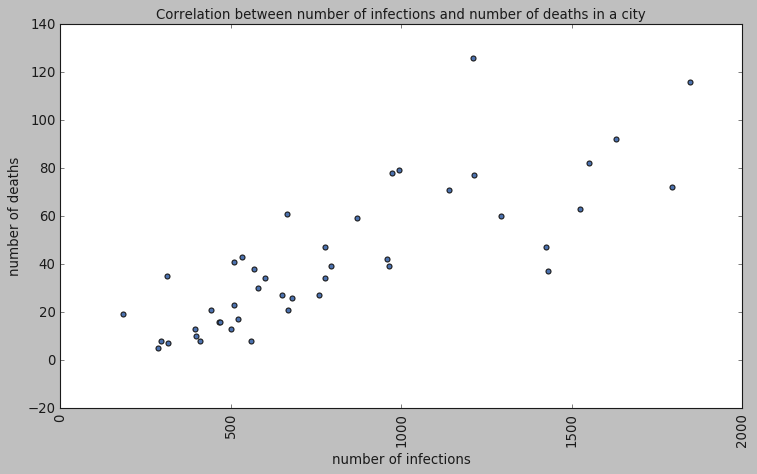

In [17]:
#Matplotlib
with plt.style.context('classic'):
    mp_scatter, mp_scatter_axes= plt.subplots(figsize=[11,6])
    mp_scatter_axes.set_title('Correlation between number of infections and number of deaths in a city', fontsize=12)
    plt.xticks(rotation='vertical')
    mp_scatter_axes.scatter(infections_data.values, deaths_data.values)
    mp_scatter_axes.set_xlabel('number of infections')
    mp_scatter_axes.set_ylabel('number of deaths')

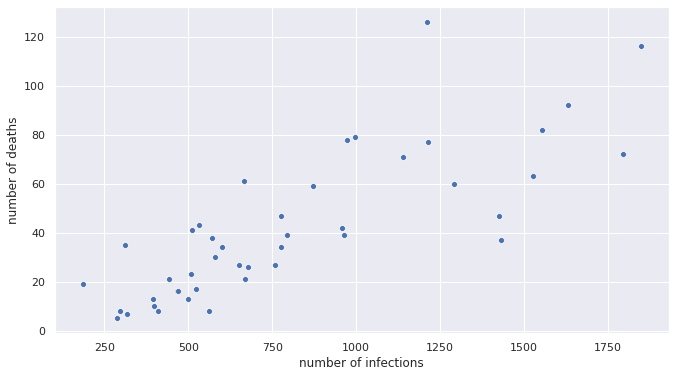

In [18]:
# Seaborn
sb_scatter_fig, sb_scatter_axes= plt.subplots(figsize=[11,6])
sb_scatter_chart=sns.scatterplot(x=infections_data.values, y=deaths_data.values)
sb_scatter_chart.set_xlabel('number of infections')
sb_scatter_chart.set_ylabel('number of deaths')
sb_scatter_chart

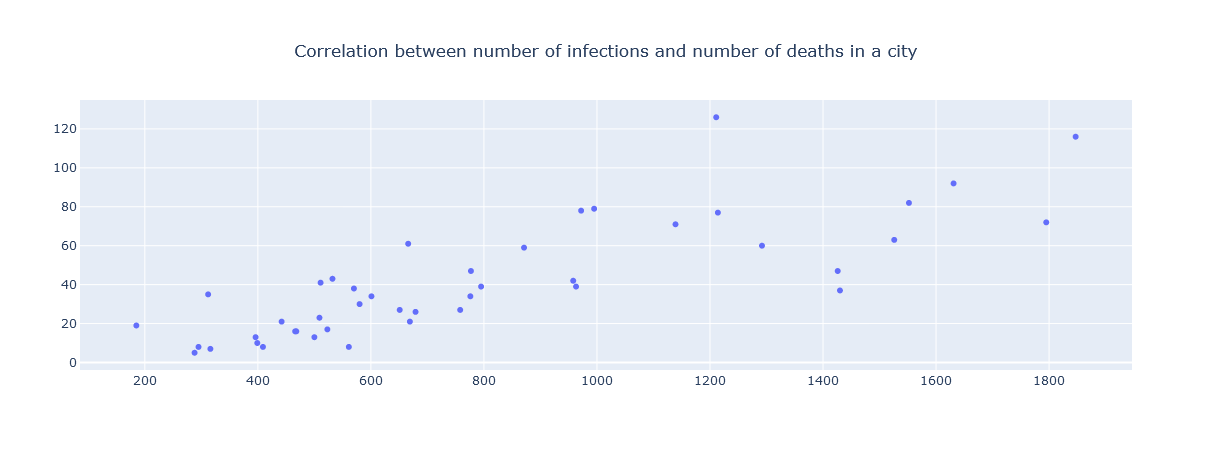

In [43]:
# Plotly
scatter_fig = go.Figure(data=go.Scatter(x=infections_data.values, y=deaths_data.values,  mode='markers'))
scatter_fig.update_layout(    title={
        'text':'Correlation between number of infections and number of deaths in a city',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
scatter_fig.show()

In [44]:
# Bokeh
title='Correlation between number of infections and number of deaths in a city'
bok_fig = figure(width=1100, title=title)

#bok_fig.xaxis.major_label_orientation = pi/2
#p.xaxis.major_label_text_font_size = '12pt'
#p.yaxis.major_label_text_font_size = '12pt'
#values= bwdata.values
bok_fig.scatter(x=infections_data.values, y=deaths_data.values)
bok_fig.title.align='center'

show(bok_fig)

In [24]:
color_range_values = (deaths_data.values/infections_data.values)*100
print(color_range_values)

[ 4.14746544 10.27027027  5.65723794  3.29593268  2.71186441  6.23353819
  3.56200528  8.08270677  3.13901345  6.28045479  8.02469136  6.66666667
  4.90566038  2.21518987  8.02348337  4.38413361  3.43347639  6.04890605
  7.93969849  3.28282828  3.41880342  9.15915916  4.01114206  2.50626566
  2.6         4.75113122 10.40462428  2.58741259  1.95599022  3.25047801
  1.42602496  5.64071122  5.28350515  4.04984424  3.82916053  6.77382319
  5.17241379  4.3814433   4.12844037  4.64396285  4.51866405  1.73611111
 11.21794872  6.34266886]


## Ease of customization

### Matplotlib

In [13]:
%matplotlib inline

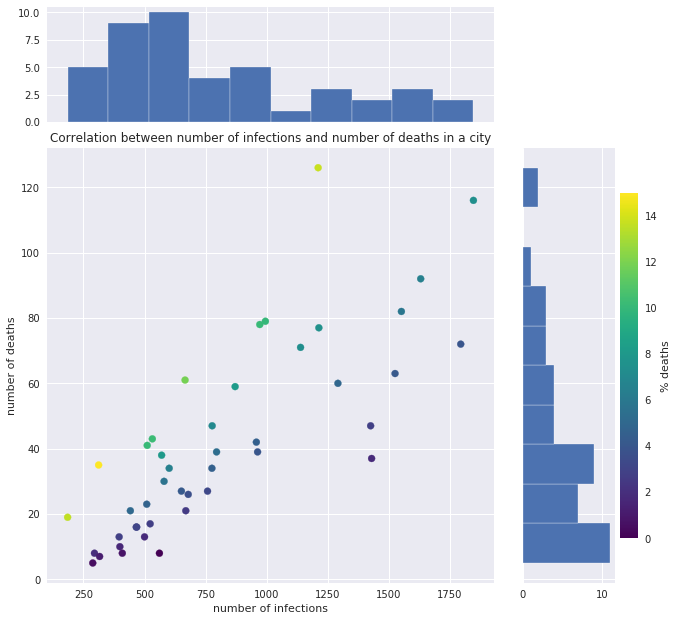

In [49]:

with plt.style.context('seaborn'):
    mp_scatter, mp_scatter_axes= plt.subplots(figsize=[8,8])
    mp_scatter_axes.scatter(infections_data.values, deaths_data.values, c=color_range_values, cmap='viridis')
    mp_scatter_axes.set_xlabel('number of infections')
    mp_scatter_axes.set_ylabel('number of deaths')
    mp_scatter_axes.set_title('Correlation between number of infections and number of deaths in a city', fontsize=12)
    mp_scatter_histx_ax = plt.axes((0.125, 0.925, 0.775, 0.2))
    mp_scatter_histx_ax.tick_params(direction='in', labelbottom=False)
    mp_scatter_histy_ax = plt.axes((0.95, 0.125, 0.2, 0.755))
    mp_scatter_histy_ax.tick_params(direction='in', labelleft=False)
    mp_scatter_histx_ax.hist(infections_data.values)
    mp_scatter_histy_ax.hist(deaths_data.values, orientation='horizontal')
    mp_scatter.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=15, clip=False), cmap='viridis'),label='% deaths')


## Seaborn

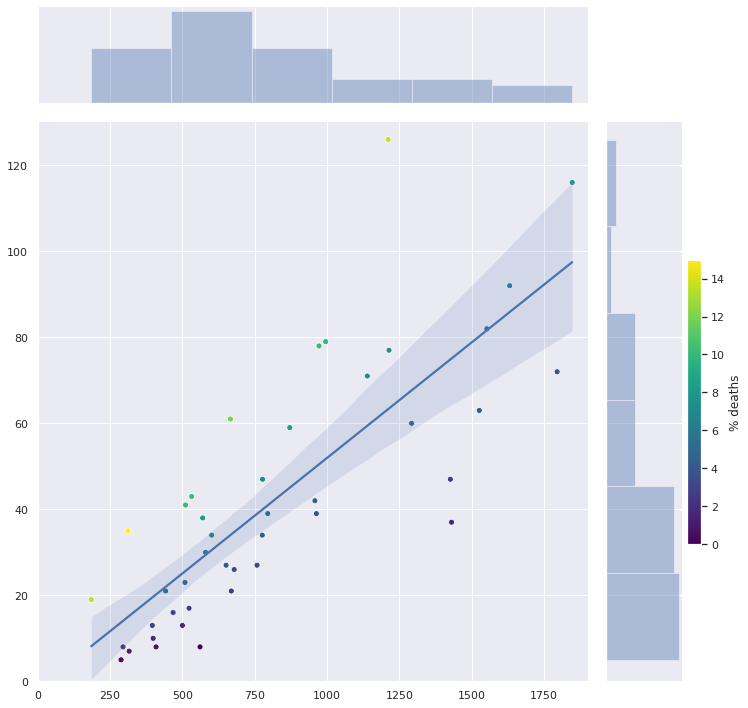

In [56]:
#sb_scatter_fig, sb_scatter_axes= plt.subplots(figsize=[8,8])
#sb_scatter_chart=sns.scatterplot(x=infections_data.values, y=deaths_data.values)
#sb_scatter_chart

#sb_scatter_chart=sns.jointplot(x=infections_data.values, y=deaths_data.values, height=10, xlim=(0,1900), ylim=(0,130), kind='reg')
#sb_scatter_chart.set_axis_labels('number of infections','number of deaths' )


sb_scatter_chart = sns.JointGrid(x=infections_data.values, y=deaths_data.values, height=10, xlim=(0,1900), ylim=(0,130))
sb_scatter_chart.plot_joint(sns.scatterplot, hue=color_range_values, palette='viridis', legend=False)
sb_scatter_chart.plot_joint(sns.regplot, scatter=False)
sb_scatter_chart.plot_marginals(sns.distplot, kde=False)
sb_scatter_chart.fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=15, clip=False), cmap='viridis'),label='% deaths')





## Plotly

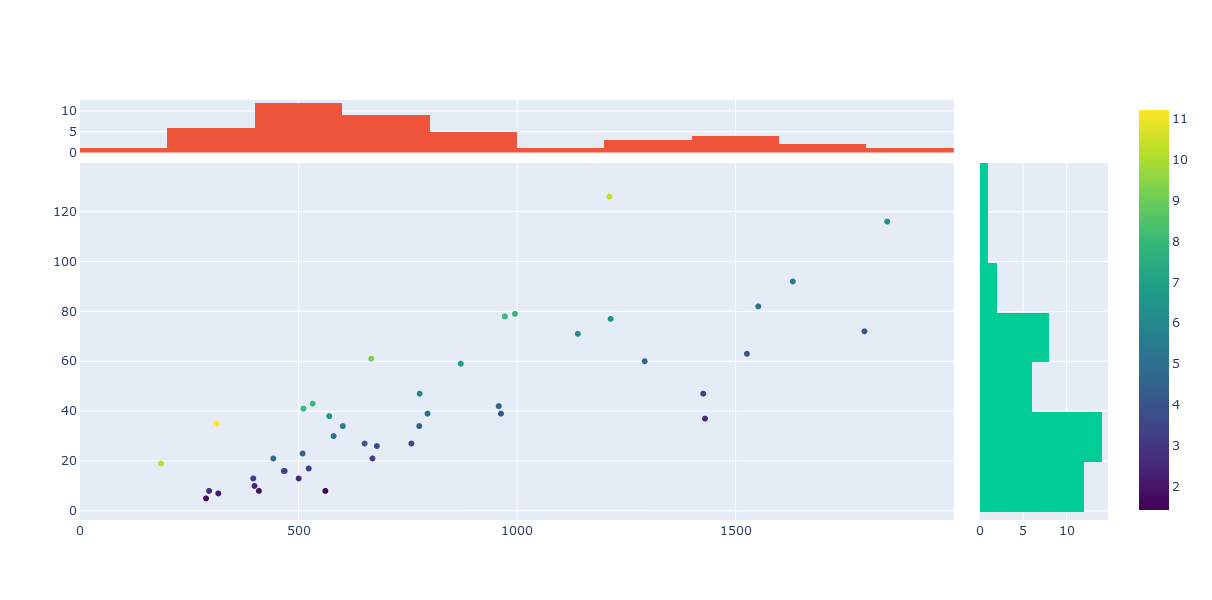

In [59]:
# Plotly
#scatter_fig = go.Figure(data=go.Scatter(x=infections_data.values, y=deaths_data.values,  mode='markers'))
#scatter_fig.update_layout(    title={
#        'text':'Correlation between number of infections and number of deaths in a city',
#        'y':0.9,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
fig = go.Figure()
fig.add_trace(go.Scatter(x = infections_data.values,y = deaths_data.values, xaxis = 'x',yaxis = 'y',mode = 'markers', marker=dict(
        color=color_range_values, 
        colorscale='Viridis',
        showscale=True
    )))
fig.add_trace(go.Histogram(x =infections_data.values ,yaxis = 'y2'))
fig.add_trace(go.Histogram(y = deaths_data.values, xaxis = 'x2'))
fig.update_layout(
    autosize = False,
    xaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = True
    ),
    yaxis = dict(
        zeroline = False,
        domain = [0,0.85],
        showgrid = True
    ),
    xaxis2 = dict(
        zeroline = False,
        domain = [0.875,1],
        showgrid = True
    ),
    yaxis2 = dict(
        zeroline = False,
        domain = [0.875,1],
        showgrid = True
    ),
    height = 600,
    width = 600,
    bargap = 0,
    hovermode = 'closest',
    showlegend = False
)

fig.show()
#scatter_fig.show()

## Bokeh

In [63]:
from bokeh.layouts import gridplot
title='Correlation between number of infections and number of deaths in a city'
#bok_scatter = figure(width=700, title=title)
#bok_scatter.scatter(x=infections_data.values, y=deaths_data.values)
#bok_scatter.title.align='center'

infection_hist, infection_edges = np.histogram(infections_data.values, bins=9)
infection_histogram = figure(width=700, height=200)
infection_hist_df = pd.DataFrame({"histogram": infection_hist, "left": infection_edges[:-1],"right": infection_edges[1:]})
infection_hist_df["interval"] = ["%d to %d" % (left, right) for left, right in zip(infection_hist_df["left"], infection_hist_df["right"])]
infection_cds = ColumnDataSource(infection_hist_df)
infection_histogram.quad(bottom = 0, top = 'histogram',left = "left", 
    right = "right", source = infection_cds, 
    line_color = "black", fill_alpha = 0.7)

deaths_hist, deaths_edges = np.histogram(deaths_data.values, bins=10)
deaths_histogram = figure(width=200, height=bok_scatter.height, y_axis_location="right")
deaths_hist_df = pd.DataFrame({"histogram": deaths_hist, "left": deaths_edges[:-1],"right": deaths_edges[1:]})
deaths_hist_df["interval"] = ["%d to %d" % (left, right) for left, right in zip(deaths_hist_df["left"], deaths_hist_df["right"])]
deaths_cds = ColumnDataSource(deaths_hist_df)
deaths_histogram.quad(bottom = 'left', top = 'right',left = 0, 
    right = "histogram", source = deaths_cds, 
    line_color = "black", fill_alpha = 0.7)

grid_plot=gridplot([[infection_histogram, None],[bok_scatter, deaths_histogram]])

show(grid_plot)
#show(bok_scatter)